<a href="https://colab.research.google.com/github/zanzivyr/Optimizers/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

1. Generate random data
2. Find the mean on y-axis
3. Set initial line of fit
4. Rotate line of fit until minimized sum of squares
5. Find best y-intercept using Gradient Descent

## Generate Random Data
First we'll generate some random data to start with.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
samples = 7

x = np.random.randint(100, size=samples)
y = np.random.randint(100, size=samples)
data = [x,y]

# Minimum values
xmin = tf.reduce_min(data[0]).numpy()
ymin = tf.reduce_min(data[1]).numpy()

# Maximum values
xmax = tf.reduce_max(data[0]).numpy()
ymax = tf.reduce_max(data[1]).numpy()

data

[array([38, 96, 50, 74, 27, 81, 11]), array([13, 67, 21, 28, 86, 95, 28])]

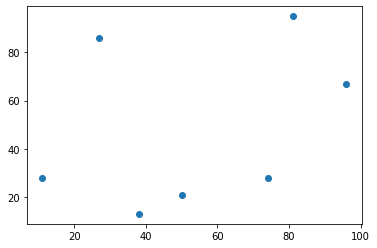

In [ ]:
plt.scatter(data[0], data[1])
plt.show()

## Find the mean on the y-axis
Now we'll find the mean on the y-axis which serves as a starting point for the y-intercept.

While there are much faster ways of implementing these functions (including an already done linear regression), we will be doing everything with loops from here on out. This is to get a good intuition for what is actually happening.

### Mean
A mean is the sum of the values of the samples divided by the samples

sum(data) / n

In [ ]:
# Find the mean on the y-axis
sum = 0
for j in y:
  sum += j

ymean = sum / samples

# Find the mean on the x-axis
sum = 0
for i in x:
  sum += i

xmean = sum / samples

ymean, xmean

(48.285714285714285, 53.857142857142854)

## Set initial line of fit

Show the line on the scatter plot

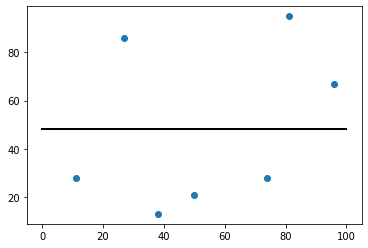

In [ ]:
plt.scatter(data[0], data[1])
plt.plot([0, 100], [ymean, ymean], color='k', linestyle='-', linewidth=2)
plt.show()

## Rotate the line of fit

1. We'll set the hyperparameters and parameters
2. Find the mean of squares
3. Then make our first rotation of the line of fit

In [ ]:
# hyperparameters
lr = 0.00001
iter = 10
thresh = 0.05

# parameters
theta = 5 * np.pi/180 # initial guess
thprev = 0
slope = 0

### Sum of Squares

Let's see an example of sum of squares of residuals:

In [ ]:
# sums of squares for initial state
sosprev = 0
for r in range(samples):
  sosprev += (data[1][r] - ymean)**2

sosprev /= samples

sosprev

966.7755102040818

In red, we have our new line based on the initial guess.

And in black, our old one.

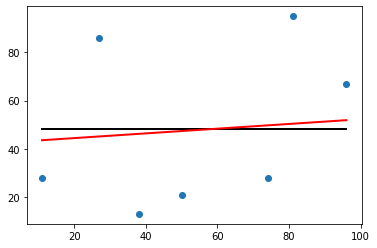

In [ ]:
# line of fit (via rotating)
delta_b = xmean*np.tan(theta)
b = ymean - delta_b
slope = delta_b / xmean

plt.scatter(data[0], data[1])
plt.plot([xmin, xmax], [ymean, ymean], color='k', linestyle='-', linewidth=2)
plt.plot([xmin, xmax], [b, slope*ymax + b], color='r', linestyle='-', linewidth=2)
plt.show()

## Find line of best fit

Using Gradient Descent, we will rotate our line until it is very near its best fit

#6: 0.374493843726246

#7: 0.3863884430769206

#8: 0.39867819313722713

#9: 0.41137979975899597

#10: 0.42451098460865716



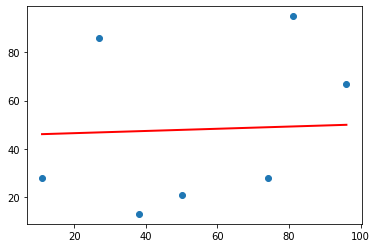

In [ ]:
# train
for i in range(iter):
  # line of fit (via rotating)
  delta_b = xmean*np.tan(theta)
  b = ymean - delta_b
  slope = delta_b / xmean

  # sums of squares
  sos = 0
  for r in range(samples):
    pred = data[0][r] * slope + b
    sos += (data[1][r] - pred)**2

  sos = sos / samples

  # using the fundamental theorem of calculus find derivative for GD
  deriv = (sos - sosprev) / (theta - thprev)
  thprev = theta
  theta = theta + lr * deriv
  if i >= iter - 5:
    print("#"+str(i+1)+": "+str((sos - sosprev) / samples))
    print()

  # GD termination condition
  if abs(sos - sosprev) / samples < thresh:
    print("Derivative: " + str(deriv))
    print("Theta: " + str(theta * 180 / np.pi))
    print("Iteration: " + str(i + 1))
    print("Metric: " + str((sos - sosprev) / samples))
    break

  sosprev = sos
  
plt.scatter(data[0], data[1])
plt.plot([xmin, xmax], [b, slope*ymax + b], color='r', linestyle='-', linewidth=2)
plt.show()